# TODO:
* double check units/formula
* backup plan in case it doesn't work (screen record & put the video in the powerpoint???) 

In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# hide the warning that the figure will remain open until closed
plt.rcParams.update({'figure.max_open_warning': 0})


In [3]:
# plot in g for visibility, but use kg in the calculations
qc_kgm3 = np.linspace(0, 5e-3, 1000)
qc_gm3 = 1000*qc_kgm3

# use representative density value - assume we're at the surface
qc_kgkg = qc_kgm3/1.225
qc_gkg = 1000*qc_kgkg


In [4]:
def kessler(qc, qc0=5e-4, ke=0.001):
    """ 
    Kessler (1969)
    dqr/dt=ke*(qc-qc0)*H(qc-qc0)
    (in kg/kg)
    """
    return ke*(qc - qc0)*np.heaviside((qc - qc0), 1)
    

In [5]:
def kk2000(qc, c=1350, a=2.47, b=-1.79):
    """ 
    Khairoutdinov & Kogan (2000);
    dqr/dt = c*(q_c^a)*(n_c^b)
    (in kg/m3)
    """
    # use a representative Nc mean value - not necessary to vary it in this ex
    nc = 100
    
    return c*(qc**a)*(nc**b)
    

In [12]:
import ipywidgets as widgets
from IPython.display import display

button1 = widgets.Button(description="Button 1")
spacer = widgets.Box(layout=widgets.Layout(width='auto', flex='1')) # Creates an expanding spacer
button2 = widgets.Button(description="Button 2")

hbox = widgets.HBox([button1, spacer, button2])
display(hbox)

Output()

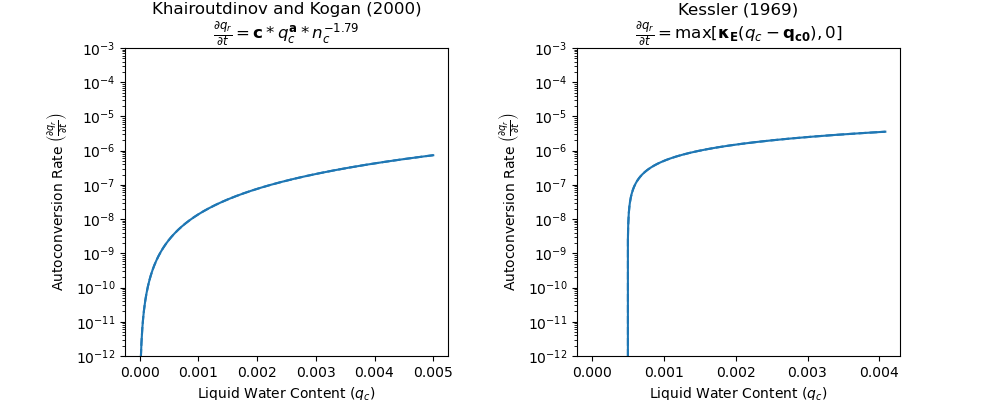

In [22]:
from ipywidgets import *

out_kk2000 = widgets.Output()
out_kessler = widgets.Output()

a_df = 2.47
c_df = 1350
qc0_df = 5e-4
ke_df = 0.001

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.4)
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False

with out_kk2000:
    ax1.plot(qc_kgm3, kk2000(qc_kgm3, a=a_df, c=c_df))
    line1, = ax1.plot(qc_kgm3, kk2000(qc_kgm3, a=a_df, c=c_df), ls="--", color="C0")
    ax1.set_title("Khairoutdinov and Kogan (2000)\n" + r"$\frac{\partial q_r}{\partial t} = {\bf{c}}*q_c^{\bf{a}}*n_c^{-1.79}$")
    ax1.set_ylabel(r"Autoconversion Rate $\left(\frac{\partial q_r}{\partial t}\right)$")# [kg m$^{-3}$ s$^{-1}$]")
    ax1.set_xlabel("Liquid Water Content ($q_c$)")# [kg/m$^3$]")
    ax1.set_yscale("log")
    ax1.set_ylim(1e-12, 1e-3)
    # ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) 

with out_kessler:
    ax2.plot(qc_kgkg, kessler(qc_kgkg, ke=ke_df, qc0=qc0_df))
    line2, = ax2.plot(qc_kgkg, kessler(qc_kgkg, ke=ke_df, qc0=qc0_df), color="C0", ls="--")
    ax2.set_title("Kessler (1969)\n" + r"$\frac{\partial q_r}{\partial t} = \text{max}\left[{\bf{\kappa_E}}\left(q_c-{\bf{q_{c0}}}\right), 0\right]$")
    ax2.set_ylabel(r"Autoconversion Rate $\left(\frac{\partial q_r}{\partial t}\right)$")# [kg kg$^{-1}$ s$^{-1}$]")
    ax2.set_xlabel("Liquid Water Content ($q_c$)")# [kg/kg]")
    ax2.set_yscale("log")
    ax2.set_ylim(1e-12, 1e-3)
    # ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) 
    


a_slider = widgets.FloatSlider(value=a_df, min=0, max=4, step=0.005, 
                                description=r'$\bf{a}$', continuous_update=True, readout_format='.2f')
c_slider = widgets.FloatSlider(value=c_df, min=10, max=c_df*10, step=1,
                                description=r'$\bf{c}$', continuous_update=True, readout_format='.0f')
ke_slider = widgets.FloatSlider(value=ke_df, min=0.0001, max=0.1, step=0.00005,
                                description=r'$\bf{\kappa_E}$', continuous_update=True, readout_format='.5f')
qc0_slider = widgets.FloatSlider(value=qc0_df, min=0, max=2e-3, step=1e-5,
                                description=r'$\bf{q_{c0}}$', continuous_update=True, readout_format='.4f')
spacer1 = widgets.Box(layout=widgets.Layout(width='10%'))
spacer2 = widgets.Box(layout=widgets.Layout(width='15%'))


def update(a, c, ke, qc0):
    line1.set_ydata(kk2000(qc_kgm3, a=a, c=c))
    line2.set_ydata(kessler(qc_kgkg, qc0=qc0, ke=ke))
    ax1.relim(); ax1.autoscale_view()
    ax2.relim(); ax2.autoscale_view()
    try:
        fig.canvas.draw_idle()
    except Exception:
        fig.canvas.draw()

controls = widgets.VBox([
    widgets.HBox([spacer, a_slider, spacer2, ke_slider]),
    widgets.HBox([spacer, c_slider, spacer2, qc0_slider])
])

out = widgets.interactive_output(update, {
    'a': a_slider, 'c': c_slider, 
    'qc0': qc0_slider, 'ke': ke_slider
})

figures_box = widgets.HBox([out_kk2000, out_kessler], spacing=10)
ui = widgets.VBox([figures_box, controls])
display(ui)
display(out)


In [23]:
plt.close()